# Linear Discriminant Analysis (LDA)

## Dependency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

## Concept

**Linear discriminant analysis (LDA)** is a model to use **multivariate Gaussian** for each class density, but use the same **covariance matrix** for all the classes. So each class has different mean $\mu_k$, but uses the same covariance matrix $\Sigma$. The same covariance matrix means that the contours of each class shape the same, but in the different locations (different means).

$$
\hat {\Sigma} = \frac {1} {N - K} \sum_{k = 1}^{K} \sum_{g_i=k}^{} (x_i - \hat{\mu}_k)(x_i - \hat{\mu}_k)^T
$$

$\Sigma$ is, in LDA, a weighted average of **covariance matrices (variance-covariance matrix)** for each class, weighted by the proportion of data in each class.

To classify, we use the following **linear discriminant function** and assign a class by taking the class which has the max value of $\delta_k (x)$ by $\underset{k} {argmax} \delta_k (x)$. Because of the shapes of the matrices, $x^T \Sigma^{-1} \mu_k$ and $\mu_k^T \Sigma^{-1} \mu_k$ are both scalars, so $\delta_k (x)$ is also a scalar.

$$
\delta_k (x) = x^T \Sigma^{-1} \mu_k - \frac {1} {2} \mu_k^T \Sigma^{-1} \mu_k + log \pi_k
$$

If instead we use $\Sigma_k$ covariance matrix for each class in the above equations, it's called **quadratic discriminant analysis (QDA)**. So the discriminant function for QDA is,

$$
\delta_k (x) = - \frac {1} {2} log |\Sigma_k| - \frac {1} {2} (x - \mu_k)^T \Sigma^{-1}_k (x - \mu_k) + log \pi_k
$$

When $p$ the number of features is large, the covariance matrix is also large. So we will have more parameters in QDA than LDA, because QDA requires different covariance matrices for each class.

People say **both LDA and QDA actually perform well** with real data, not because the real-data follows Gaussian, but because LDA and QDA set **simple decision boundaries** and **estimates by Gaussian models are stable**, so that they give us **low variance** (though with bias of linear decision boundaries) under **bias variance tradeoff**.

## Covariance matrix

In [21]:
n = 100
p = 2
X = np.random.randn(n, p)

v11 = np.sum( (X[:, 0] - np.mean(X[:, 0])) * (X[:, 0] - np.mean(X[:, 0])) ) / (n - 1)
v12 = np.sum( (X[:, 0] - np.mean(X[:, 0])) * (X[:, 1] - np.mean(X[:, 1])) ) / (n - 1)
v22 = np.sum( (X[:, 1] - np.mean(X[:, 1])) * (X[:, 1] - np.mean(X[:, 1])) ) / (n - 1)

cov_mat = np.zeros((p, p))
cov_mat[0, 0] = v11
cov_mat[0, 1] = v12
cov_mat[1, 0] = v12
cov_mat[1, 1] = v22

print('Covariance matrix by manual')
print(np.round(cov_mat, 4))
print()

print('Covariance matrix from Numpy')
print(np.round(np.cov(X.T), 4))
print()



Covariance matrix by manual
[[1.0608 0.0058]
 [0.0058 0.9277]]

Covariance matrix from Numpy
[[1.0608 0.0058]
 [0.0058 0.9277]]



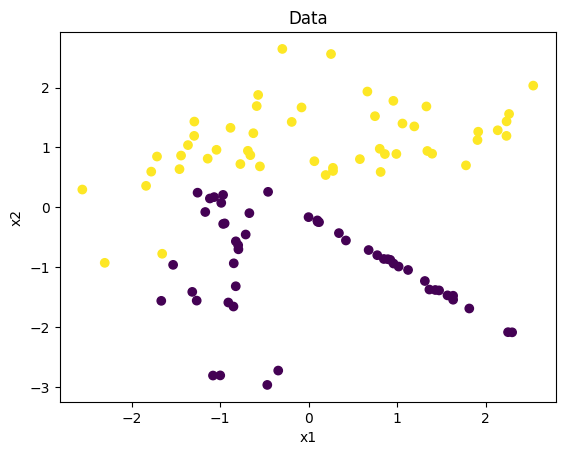

In [85]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_classes=2,
    random_state=4,
    n_informative=2,
    n_redundant=0
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [183]:
k = 2

# Split the given data into classes
X_0 = X[y == 0, :]
X_1 = X[y == 1, :]

# Number of data
n_0 = X_0.shape[0]
n_1 = X_1.shape[0]

print('Number of data')
print(f'class: 0, {n_0}')
print(f'class: 1, {n_1}')
print()

# Mean
mu_0 = np.mean(X_0, axis=0)
mu_1 = np.mean(X_1, axis=0)

print('Means')
print(f'class: 0, {mu_0}')
print(f'class: 1, {mu_1}')
print()

# Prior probability
n = X.shape[0]
pi_0 = n_0 / n
pi_1 = n_1 / n

print('Prior')
print(pi_0, pi_1)
print()

# Covariance matrix
cov_mat_0 = np.zeros((p, p))
cov_mat_0[0, 0] = np.sum( (X_0[:, 0] - mu_0[0]) * (X_0[:, 0] - mu_0[0]) ) / n_0
cov_mat_0[0, 1] = np.sum( (X_0[:, 0] - mu_0[0]) * (X_0[:, 1] - mu_0[1]) ) / n_0
cov_mat_0[1, 0] = np.sum( (X_0[:, 0] - mu_0[0]) * (X_0[:, 1] - mu_0[1]) ) / n_0
cov_mat_0[1, 1] = np.sum( (X_0[:, 1] - mu_0[1]) * (X_0[:, 1] - mu_0[1]) ) / n_0

cov_mat_1 = np.zeros((p, p))
cov_mat_1[0, 0] = np.sum( (X_1[:, 0] - mu_1[0]) * (X_1[:, 0] - mu_1[0]) ) / n_1
cov_mat_1[0, 1] = np.sum( (X_1[:, 0] - mu_1[0]) * (X_1[:, 1] - mu_1[1]) ) / n_1
cov_mat_1[1, 0] = np.sum( (X_1[:, 0] - mu_1[0]) * (X_1[:, 1] - mu_1[1]) ) / n_1
cov_mat_1[1, 1] = np.sum( (X_1[:, 1] - mu_1[1]) * (X_1[:, 1] - mu_1[1]) ) / n_1

cov_mat = pi_0 * cov_mat_0 + pi_1 * cov_mat_1

print('Covariance matrix')
print(cov_mat)
print()

x = np.array([
    [0, 0]
])
print(x.shape)

delta_0 = np.array([[0, 0]]) @ np.linalg.inv(cov_mat) @ mu_0 - (1 / 2) * mu_0.T @ np.linalg.inv(cov_mat) @ mu_0 + np.log(pi_0)
delta_1 = np.array([[0, 0]]) @ np.linalg.inv(cov_mat) @ mu_1 - (1 / 2) * mu_1.T @ np.linalg.inv(cov_mat) @ mu_1 + np.log(pi_1)

print(np.argmax([delta_0, delta_1]))

Number of data
class: 0, 50
class: 1, 50

Means
class: 0, [ 0.00450024 -0.98048413]
class: 1, [0.08001472 1.07609546]

Prior
0.5 0.5

Covariance matrix
[[1.51964001 0.06769972]
 [0.06769972 0.54792365]]

(1, 2)
0


In [181]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

print(f'Means, shape: (class, feature)') 
print(f'{lda.means_}')
print()
print(f'Priors, shape: (class,)')
print(f'{lda.priors_}')
print()
print(f'Covariance matrix, shape: (feature, feature)')
print(f'{lda.covariance_}')
print()

lda.predict_proba([[0, 0]])

Means, shape: (class, feature)
[[ 0.00450024 -0.98048413]
 [ 0.08001472  1.07609546]]

Priors, shape: (class,)
[0.5 0.5]

Covariance matrix, shape: (feature, feature)
[[1.51964001 0.06769972]
 [0.06769972 0.54792365]]



array([[0.54280388, 0.45719612]])

## Parameter

In [66]:
N_SAMPLES = 1000
# N_FEATURES = 10
N_FEATURES = 2
# N_INFORMATIVE = 10
N_INFORMATIVE = 2
N_REDUNDANT = 0
N_CLASSES = 2
RANDOM_STATE = 4

N_SPLITS = 10
N_REPEATS = 3

## Data

In [56]:
X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=N_INFORMATIVE,
    n_redundant=N_REDUNDANT,
    n_classes=N_CLASSES,
    random_state=RANDOM_STATE
)

In [57]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [58]:
pd.DataFrame(X).head()

,0,1
0,1.001994,0.654135
1,0.775119,1.514057
2,1.059481,-0.922868
3,-0.546336,-2.559176
4,0.778612,-2.628581


In [59]:
pd.DataFrame(y).head()

,0
0,1
1,1
2,1
3,0
4,1


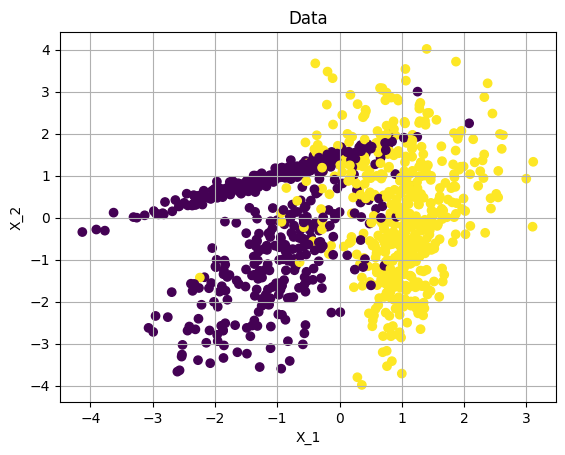

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Data')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.grid()
plt.show()

## Model

In [61]:
model = LinearDiscriminantAnalysis()

cv = RepeatedStratifiedKFold(n_splits=N_SPLITS, n_repeats=N_REPEATS, random_state=RANDOM_STATE)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [62]:
print(f'Mean accuracy: {np.mean(scores):.1%}, Std accuracy: {np.std(scores):.1f}')

Mean accuracy: 89.6%, Std accuracy: 0.0


## Prediction

In [63]:
model.fit(X, y)

LinearDiscriminantAnalysis()

In [64]:
x1s = []
x2s = []
for i in np.linspace(-4, 4, 100):
    for j in np.linspace(-3, 3, 100):
        probs = model.predict_proba([[i, j]])
                
        if probs[0][0] > 0.45 and probs[0][1] > 0.5:
            x1s.append(i)
            x2s.append(j)

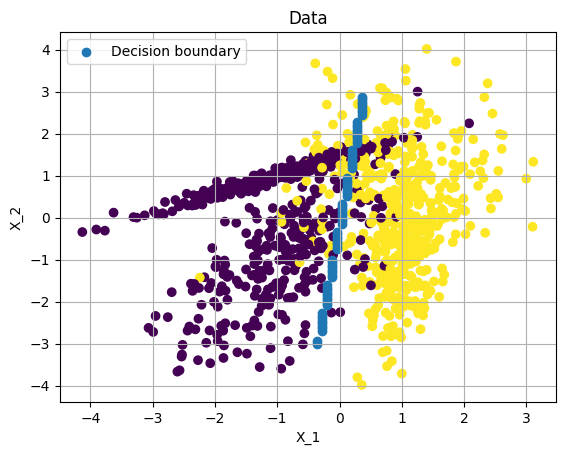

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(x1s, x2s, label='Decision boundary')
plt.title('Data')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.legend()
plt.grid()
plt.show()

## Reference
- [Estimating the covariance matrix in linear discriminant analysis](https://stats.stackexchange.com/questions/90615/estimating-the-covariance-matrix-in-linear-discriminant-analysis)
- [Pooled variance](https://en.wikipedia.org/wiki/Pooled_variance)